### Analysis of stackoverflow survey data

#### The aim of the project is to find career satisfaction across countries, undegraduate majors and professional carrer. Our questions that will be examined within a project will be:

- What are top countries by count that are represented in survey?
- what is distribution of career satisfaction level? Are respondents feel satisfied with their career?
- In which countries professional developers feel happier or less happier?


> initially I will import functions via libraries like pandas, numpy and maplotlib. Pandas is used for data manipulation, numpy for mathetical functions and matplotlib for visualization purposes. After, we will import data.

In [347]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


public = pd.read_csv("D:\dsn\survey_results_public.csv")
##schema = pd.read_csv("D:\dsn\survey_results_schema.csv")

> Lets quickly inspect data

In [348]:
print("Data public has {} rows and {} columns".format(public.shape[0],public.shape[1]))

Data public has 51392 rows and 154 columns


In [349]:
print("Only {} columns has no missing values".format(public.isnull().sum().sort_values(ascending=True).value_counts(0)[0]))

Only 7 columns has no missing values


> I will write two functions which will help to summarize data. First function summary_num will help me to summarise numeric or integer columns. It will depict type of data, mean, median, standard deviation of population and number of missing rows in the column. Summary_object will summarise string columns.

In [350]:
def summary_num (df):
    cnt = 1
    for i in df.columns:
        if df[i].dtypes in ["int64","float64"] and df[i].value_counts().sum() < df.shape[0]:
            print("{}  {}, data type: {}, mean is {}, median: {}, std. deviation: {}, missing rows: {}".format(cnt,i,df[i].dtypes,round(df[i].mean(),1),round(df[i].median(),1), round(df[i].std(),1), df[i].isnull().sum()))
            cnt += 1

> We can see that we have 6 numeric or integer columns within a dataframe excluding Respondents columns which assigns numbers to respondents. It prints out that mean career satisfaction is 7.3 and median is 8. Number of missing rows is 8697

In [351]:
summary_num(public)

1  CareerSatisfaction, data type: float64, mean is 7.3, median: 8.0, std. deviation: 2.0, missing rows: 8697
2  JobSatisfaction, data type: float64, mean is 7.0, median: 7.0, std. deviation: 2.2, missing rows: 11016
3  HoursPerWeek, data type: float64, mean is 4.0, median: 1.0, std. deviation: 7.6, missing rows: 30792
4  StackOverflowSatisfaction, data type: float64, mean is 8.4, median: 9.0, std. deviation: 1.4, missing rows: 14800
5  Salary, data type: float64, mean is 56298.5, median: 50000.0, std. deviation: 39880.9, missing rows: 38501
6  ExpectedSalary, data type: float64, mean is 33142.2, median: 29364.3, std. deviation: 30163.0, missing rows: 48826


> Function summary_object will show number of columns with string data type and number of missing values in each column

In [352]:
def summary_object(df):
    cnt = 1
    for i in df.columns:
        if df[i].dtypes == "object":
            print("{}  {}, missing values: {}".format(cnt, i,df[i].isnull().sum()))
            cnt += 1

In [353]:
summary_object(public)

1  Professional, missing values: 0
2  ProgramHobby, missing values: 0
3  Country, missing values: 0
4  University, missing values: 0
5  EmploymentStatus, missing values: 0
6  FormalEducation, missing values: 0
7  MajorUndergrad, missing values: 8551
8  HomeRemote, missing values: 7384
9  CompanySize, missing values: 12470
10  CompanyType, missing values: 12569
11  YearsProgram, missing values: 247
12  YearsCodedJob, missing values: 10502
13  YearsCodedJobPast, missing values: 50418
14  DeveloperType, missing values: 15267
15  WebDeveloperType, missing values: 40696
16  MobileDeveloperType, missing values: 49839
17  NonDeveloperType, missing values: 46502
18  ExCoderReturn, missing values: 50469
19  ExCoderNotForMe, missing values: 50471
20  ExCoderBalance, missing values: 50469
21  ExCoder10Years, missing values: 50475
22  ExCoderBelonged, missing values: 50464
23  ExCoderSkills, missing values: 50457
24  ExCoderWillNotCode, missing values: 50470
25  ExCoderActive, missing values: 5046

> We have many columns that have missing values. In order to gain better understanding of data I will keep variables that only has <= 20% missing value. I will create new column df_no_miss. It has 13 columns left with 7 non missing ones 

In [354]:
few_missing = []
for i in public.columns:
    if((public[i].isnull().sum() / public.shape[0]) * 100  <= 20):
        few_missing.append(i)
        
df_no_miss = public[few_missing]
print("New dataframe df_no_miss has {} rows & {} columns".format(df_no_miss.shape[0],df_no_miss.shape[1]))
print(df_no_miss.isnull().sum())

New dataframe df_no_miss has 51392 rows & 13 columns
Respondent               0
Professional             0
ProgramHobby             0
Country                  0
University               0
EmploymentStatus         0
FormalEducation          0
MajorUndergrad        8551
HomeRemote            7384
YearsProgram           247
CareerSatisfaction    8697
PronounceGIF           384
ClickyKeys            9346
dtype: int64


> Only one numeric variables left after filteration (Career Satisfaction)

In [355]:
df_no_miss.dtypes

Respondent              int64
Professional           object
ProgramHobby           object
Country                object
University             object
EmploymentStatus       object
FormalEducation        object
MajorUndergrad         object
HomeRemote             object
YearsProgram           object
CareerSatisfaction    float64
PronounceGIF           object
ClickyKeys             object
dtype: object

> Lets inspect distribution of career satisfaction. Majority of respondets seems satisfied with their career

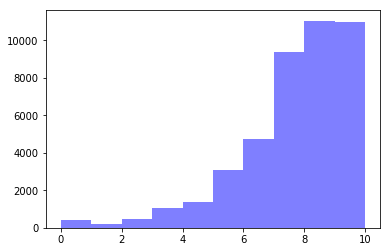

In [356]:
plt.hist(list(df_no_miss["CareerSatisfaction"].dropna()), 10, facecolor='blue', alpha=0.5)
plt.show()

In [357]:
print("Career satisfaction has {} missing values".format(df_no_miss.CareerSatisfaction.isnull().sum()))

Career satisfaction has 8697 missing values


> Now I will replace missing values of CareerSatisfaction with mean values by Country and Professional in order to avoid high bias. If means by Country and Professional is missing too then it will be replace by mean of CareerSatisfaction.

In [358]:
ms_val = []
for i in range(0,df_no_miss.shape[0],1):
    if (df_no_miss.iloc[i,10] not in list(range(0,11,1))):
        b = df_no_miss[(df_no_miss["Country"] == df_no_miss.iloc[i,3]) & (df_no_miss["Professional"] == df_no_miss.iloc[i,1])].groupby(["Country","Professional"])["CareerSatisfaction"].mean()[0]
        if (b not in list(range(0,11,1))):
            b = df_no_miss.CareerSatisfaction.mean()
        b = round(b,0)
        ms_val.append(b)
    else:
        a = df_no_miss.iloc[i,10]
        ms_val.append(a)

In [359]:
df_no_miss["Career_Satisfaction_no_missing"] = ms_val

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [360]:
df_no_miss.isnull().sum()

Respondent                           0
Professional                         0
ProgramHobby                         0
Country                              0
University                           0
EmploymentStatus                     0
FormalEducation                      0
MajorUndergrad                    8551
HomeRemote                        7384
YearsProgram                       247
CareerSatisfaction                8697
PronounceGIF                       384
ClickyKeys                        9346
Career_Satisfaction_no_missing       0
dtype: int64

> Which are top 50 countries that are represented in our data? We have some countries with few population (Lithuania,Israel,Singapore) that are represented amoung top 50 countries.

In [361]:
df_no_miss['Country'].groupby(df_no_miss['Country']).count().sort_values(ascending=False)[0:49]

Country
United States         11455
India                  5197
United Kingdom         4395
Germany                4143
Canada                 2233
France                 1740
Poland                 1290
Australia               913
Russian Federation      873
Spain                   864
Netherlands             855
Italy                   781
Brazil                  777
Sweden                  611
Switzerland             595
Israel                  575
Romania                 561
Iran                    507
Austria                 477
Pakistan                454
Czech Republic          411
Belgium                 404
South Africa            380
Turkey                  363
Ukraine                 356
Mexico                  351
Ireland                 345
Hungary                 332
Philippines             328
Slovenia                303
Denmark                 300
Greece                  298
Indonesia               289
Finland                 287
Portugal                271
Norway      

> I will look at countries that have respondents >= 300 people and check mean of satisfaction by professions to determine which countries are happier as professional developers.
We see that professional developers in Mexico, Israel & the USA seem more satisfied while professional developers in Tukey, Italy, India & Germany has lower satisfaction level

In [362]:
country_list = []
for i in df_no_miss.Country.unique():
    if(df_no_miss.Country[df_no_miss.Country == i].shape[0] >= 300):
        country_list.append(i)
        
top_countries = df_no_miss.loc[df_no_miss['Country'].isin(country_list)]

pd.crosstab(index=top_countries['Country'], columns=top_countries['Professional'], values=top_countries['Career_Satisfaction_no_missing'], colnames=['Profession'], aggfunc='mean').sort_values('Professional developer', ascending=False)

Profession,None of these,Professional developer,Professional non-developer who sometimes writes code,Student,Used to be a professional developer
Country,,,,,
Mexico,8.333333,8.482625,8.342105,7.0,7.333333
Israel,7.666667,8.067538,6.439024,7.0,6.000000
United States,6.376518,7.759567,7.195997,7.0,7.115226
Canada,7.085714,7.731464,7.069892,7.0,7.250000
Romania,4.555556,7.674473,7.028571,6.0,7.555556
Netherlands,6.650000,7.635727,7.287356,7.0,7.500000
Australia,6.227273,7.578538,6.892857,7.0,5.880000
Denmark,5.285714,7.578475,7.608696,7.0,8.400000
South Africa,6.333333,7.514851,6.175000,7.0,5.666667


> Which major undergraduates are happier as professional developers? Seems that respondents with business, social sciences majors are happier than computer science related undergrads

In [363]:


fe = df_no_miss.loc[(df_no_miss.Professional == "Professional developer") & (df_no_miss.HomeRemote.notnull()) ,["Professional","FormalEducation","MajorUndergrad","Career_Satisfaction_no_missing"]]

pd.crosstab(index=fe['MajorUndergrad'], columns=fe['Professional'], values=fe['Career_Satisfaction_no_missing'], colnames=['Profession'], aggfunc='mean').sort_values("Professional developer",ascending=False)

Profession,Professional developer
MajorUndergrad,
A business discipline,7.700361
Fine arts or performing arts,7.651163
A social science,7.599496
Psychology,7.593985
A health science,7.551724
Management information systems,7.543103
A humanities discipline,7.540064
I never declared a major,7.514354
A natural science,7.481190



#### Based on our data we can conclude the following:

 - Generally professional developers happier in their career
 - Some small countries (by population) like Israel, Lithuania have enough respondents
 - Developers in the USA, Israel, Mexico and Canada are happier than in other countries. Developers in Italy, Turkey and India seems less happier with their career
 - Respondents with business and social sciences undergraduate majors are happier than respondets with computer science related undergrad

